In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import seaborn

In [2]:
def plot_flux(data):
    print(data['T'].iloc[0], data['R'].iloc[0], data['d'].iloc[0])
    fg = seaborn.FacetGrid(data=data, height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'smearing_step', 'field', 'err', marker="o", fmt='', linestyle = '').add_legend()
    plt.show()

def plot_smearing_dependence(beta, mu, matrix_type, monopole, lattice_size, smearing, conf_type, smearing_min, smearing_max):
    df_data = pd.read_csv(f"../../result/flux_tube_wilson/{matrix_type}/{conf_type}/{lattice_size}/{beta}/{mu}/{matrix_type}-{monopole}/flux_tube_wilson_{smearing}.csv", index_col=None)
    print(f"../../result/flux_tube_wilson/{matrix_type}/{conf_type}/{lattice_size}/{beta}/{mu}/{matrix_type}-{monopole}/flux_tube_wilson_{smearing}.csv")
    
    df_data = df_data[df_data['smearing_step'] >= smearing_min]
    df_data = df_data[df_data['smearing_step'] <= smearing_max]
    
    df_data.groupby(['T', 'R', 'd']).apply(plot_flux)

def plot_flux_time(data):
    print(data['R'].iloc[0], data['d'].iloc[0])
    fg = seaborn.FacetGrid(data=data, hue = 'smearing_step', height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'T', 'field', 'err', marker="o", fmt='', linestyle = '').add_legend()
    plt.show()

def plot_time_dependence(beta, mu, matrix_type, monopole, lattice_size, smearing, conf_type, smearing_steps, T_max):
    df_data = pd.read_csv(f"../../result/flux_tube_wilson/{matrix_type}/{conf_type}/{lattice_size}/{beta}/{matrix_type}-{monopole}/flux_tube_wilson_{smearing}{mu}.csv", index_col=None)
    
    df_data = df_data[df_data['smearing_step'].isin(smearing_steps)]
    df_data = df_data[df_data['T'] <= T_max]

    # df = df_data[df_data['R'] == 8]
    # df = df[df_data['smearing_step'] == 2]

    # print(df)
    
    df_data.groupby(['R', 'd']).apply(plot_flux_time)

def plot_flux_smearing_comparison(data):
    print(data['T'].iloc[0], data['R'].iloc[0], data['d'].iloc[0])
    fg = seaborn.FacetGrid(data=data, height=3.5, aspect=1.61)
    fg.map(plt.errorbar, 'alpha', 'field', 'err', marker="o", fmt='', linestyle = '').add_legend()
    plt.show()

def plot_smearing_comparison(beta, mu, matrix_type, monopole, lattice_size, smearing, conf_type, params, T_max):
    data = []
    for alpha, smearing_step in params.items():
        data.append(pd.read_csv(f"../../result/flux_tube_wilson/{matrix_type}/{conf_type}/{lattice_size}/beta{beta}/{matrix_type}-{monopole}/flux_tube_wilson_{smearing}{alpha}{mu}.csv", index_col=None))
        data[-1]['alpha'] = alpha
        data[-1] = data[-1][data[-1]['smearing_step'] == smearing_step]

    data = pd.concat(data)
    data = data[data['T'] <= T_max]

    data.groupby(['R', 'd', 'T']).apply(plot_flux_smearing_comparison)
    


4 6 0


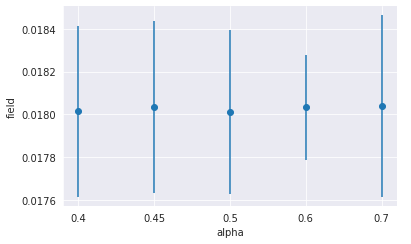

6 6 0


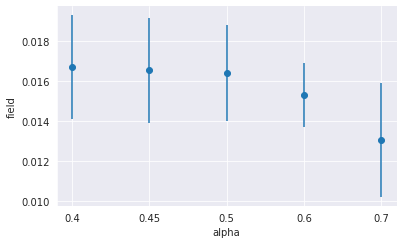

8 6 0


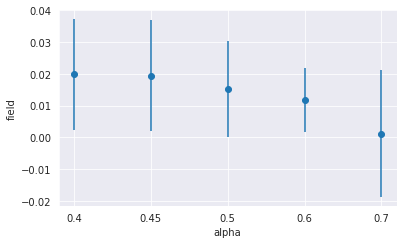

4 6 3


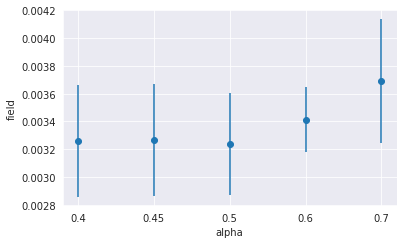

6 6 3


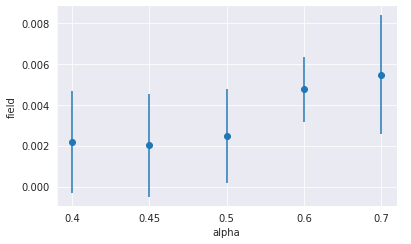

8 6 3


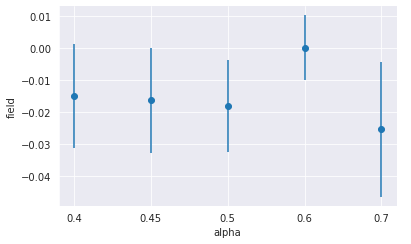

4 8 0


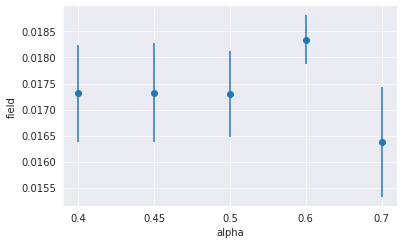

6 8 0


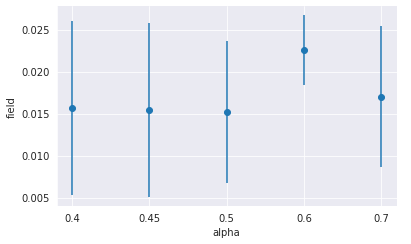

8 8 0


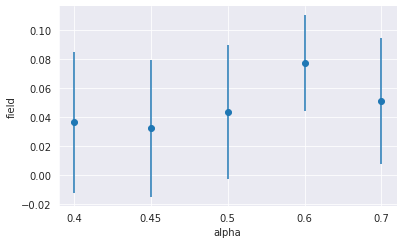

4 8 4


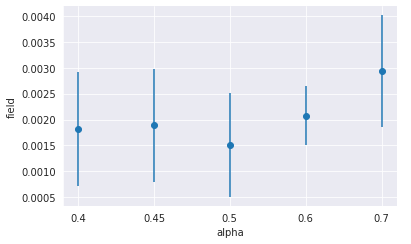

6 8 4


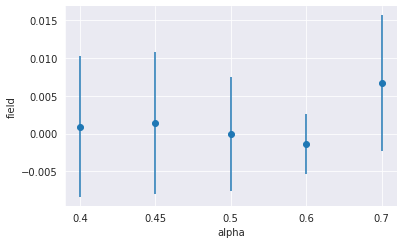

8 8 4


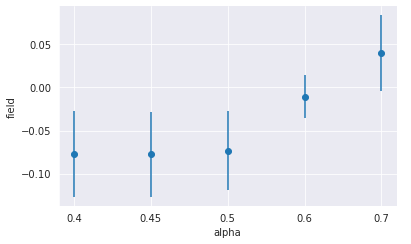

4 12 0


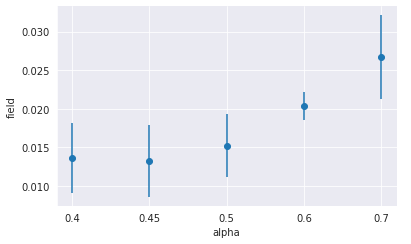

6 12 0


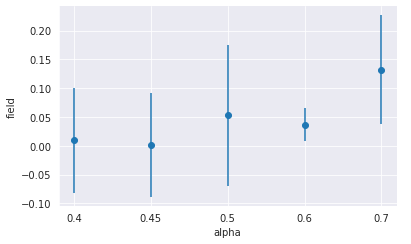

8 12 0


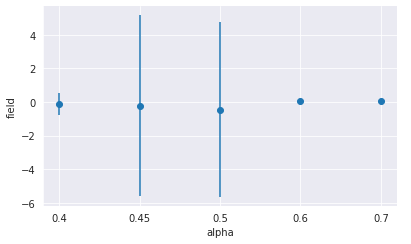

4 12 6


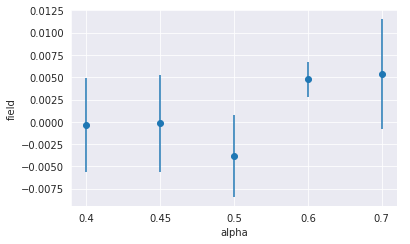

6 12 6


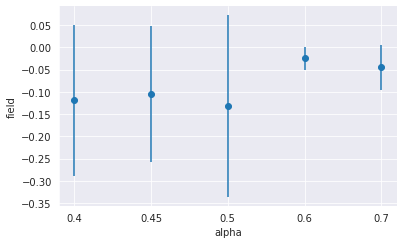

8 12 6


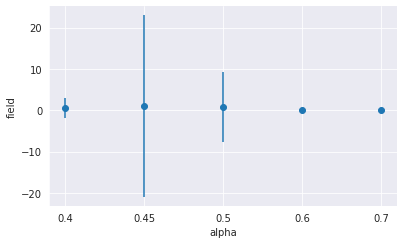

In [25]:
params = {'0.4': 601, '0.45': 601, '0.5': 301, '0.6': 31, '0.7': 19}
plot_smearing_comparison('2.4', '', 'su2', 'su2', '24^4', 'HYP0_alpha=1_1_0.5_APE_alpha=', 'su2_suzuki', params, 8)

4 6 0


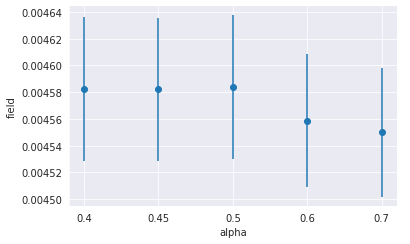

6 6 0


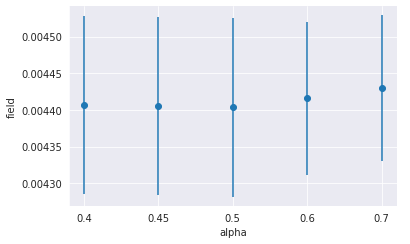

8 6 0


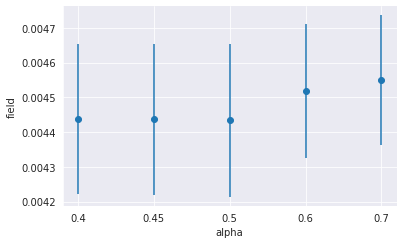

4 6 3


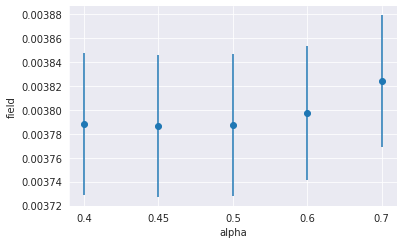

6 6 3


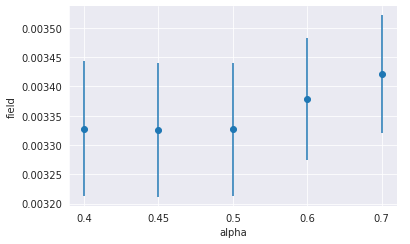

8 6 3


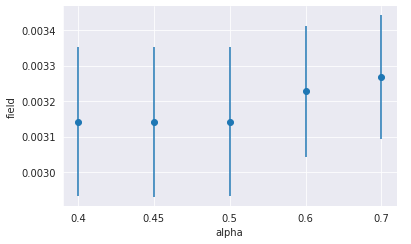

4 8 0


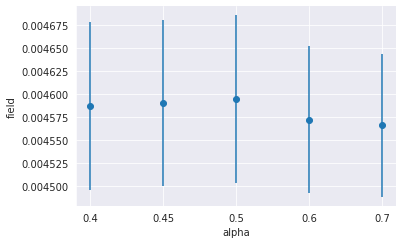

6 8 0


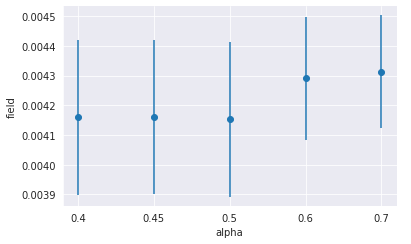

8 8 0


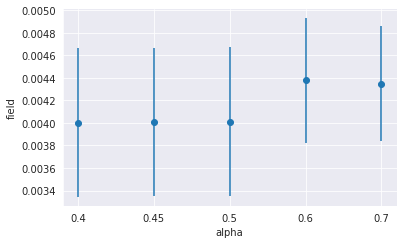

4 8 4


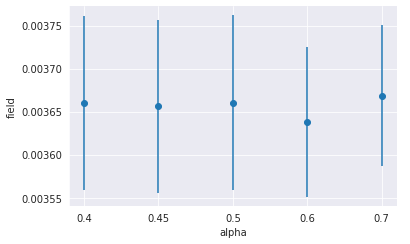

6 8 4


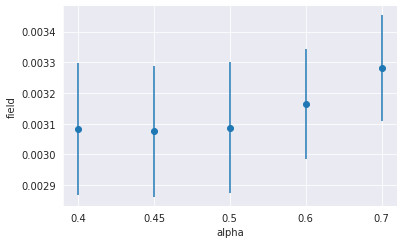

8 8 4


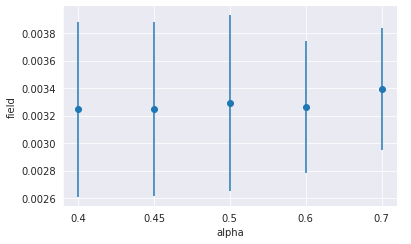

4 12 0


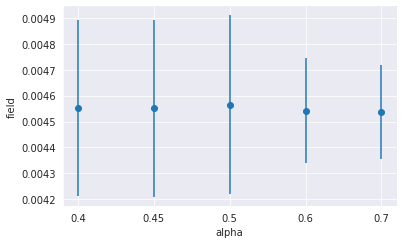

6 12 0


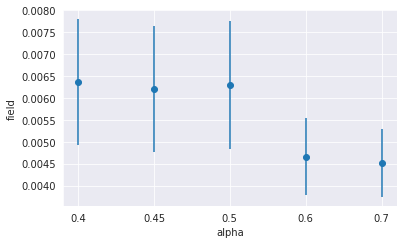

8 12 0


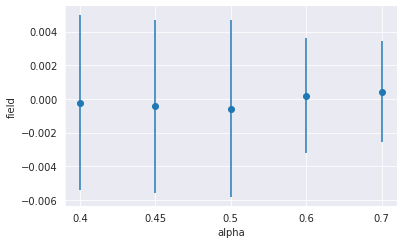

4 12 6


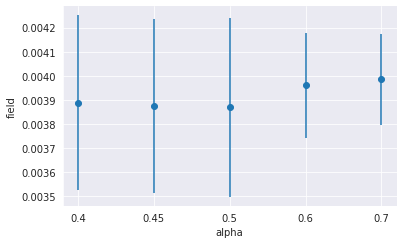

6 12 6


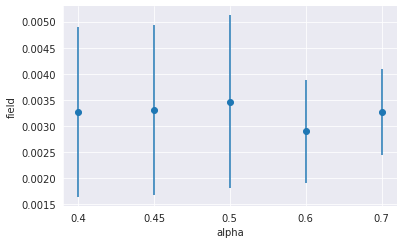

8 12 6


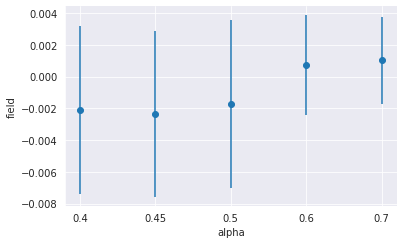

In [27]:
params = {'0.4': 301, '0.45': 301, '0.5': 601, '0.6': 31, '0.7': 17}
plot_smearing_comparison('2.4', '', 'su2', 'monopole', '24^4', 'HYP0_alpha=1_1_0.5_APE_alpha=', 'su2_suzuki', params, 8)

../../result/flux_tube_wilson/su2/qc2dstag/40^4//mu0.00/su2-monopole/flux_tube_wilson_HYP0_alpha=1_1_0.5_APE_alpha=0.5.csv
4 6 0


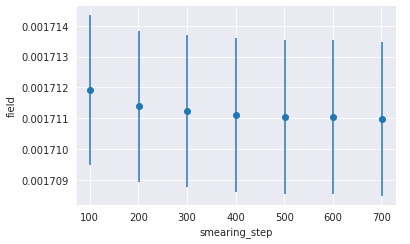

4 6 3


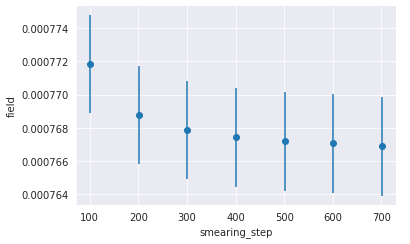

4 8 0


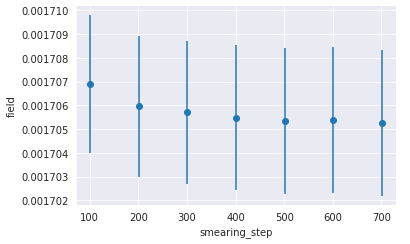

4 8 4


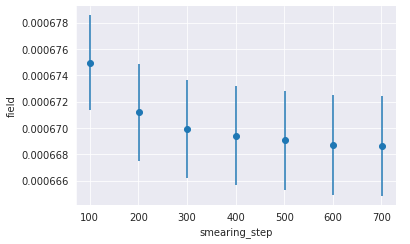

4 12 0


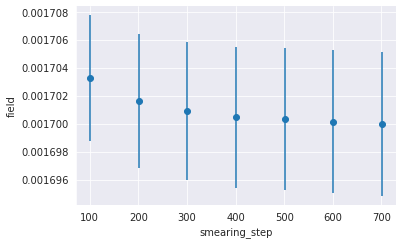

4 12 6


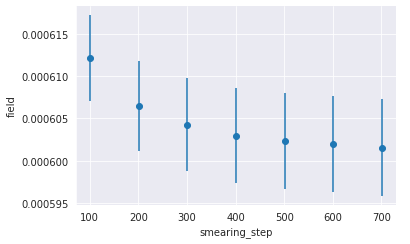

6 6 0


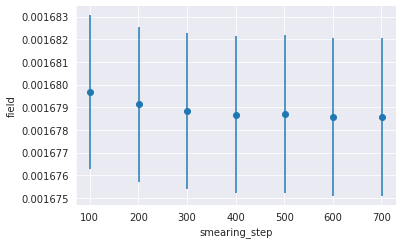

6 6 3


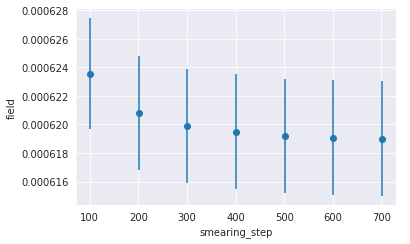

6 8 0


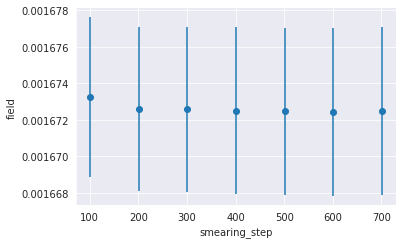

6 8 4


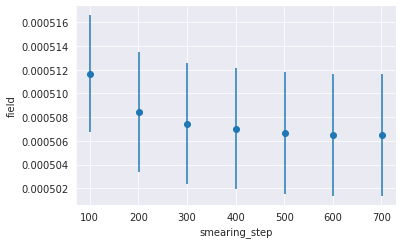

6 12 0


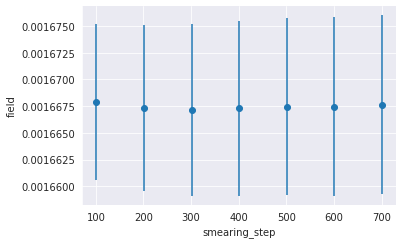

6 12 6


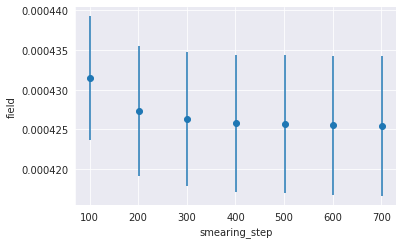

8 6 0


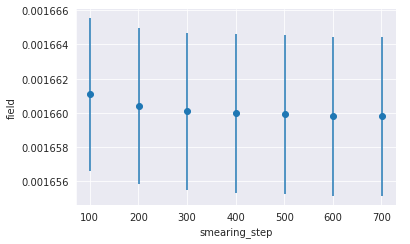

8 6 3


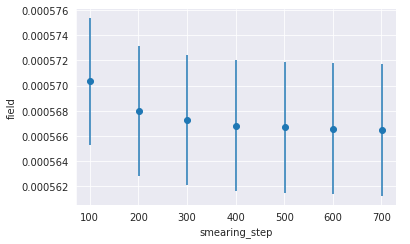

8 8 0


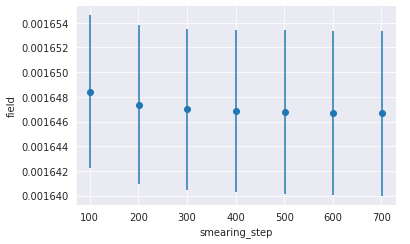

8 8 4


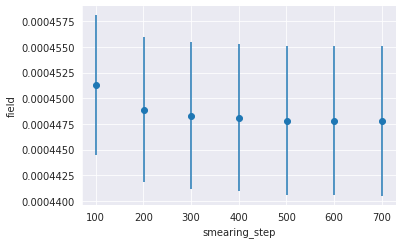

8 12 0


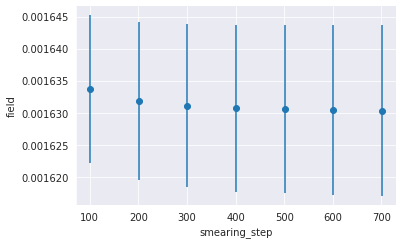

8 12 6


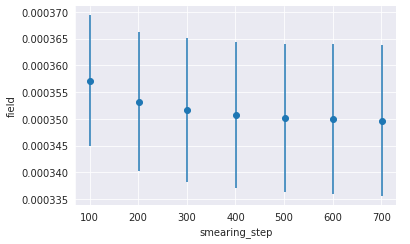

10 6 0


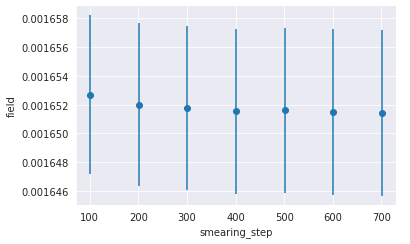

10 6 3


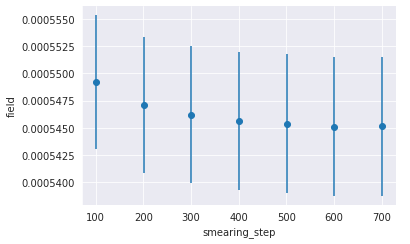

10 8 0


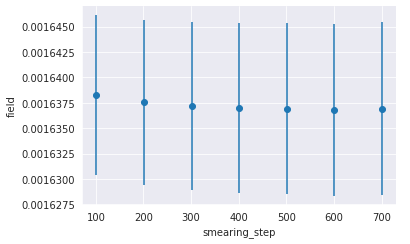

10 8 4


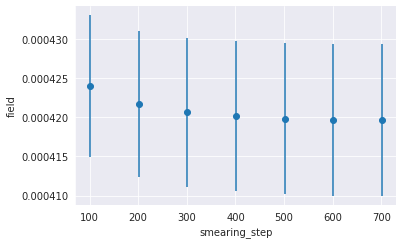

10 12 0


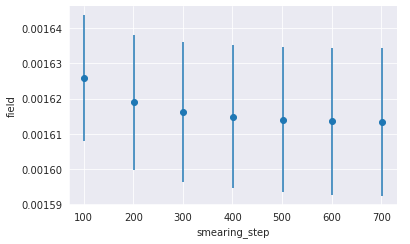

10 12 6


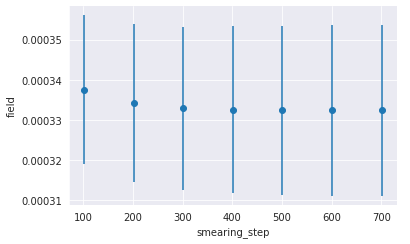

12 6 0


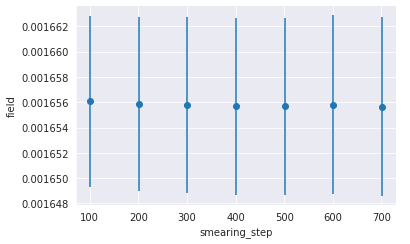

12 6 3


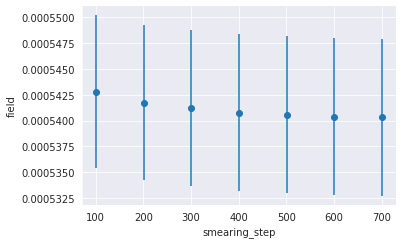

12 8 0


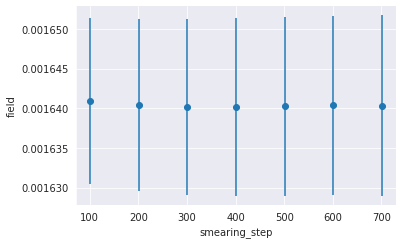

12 8 4


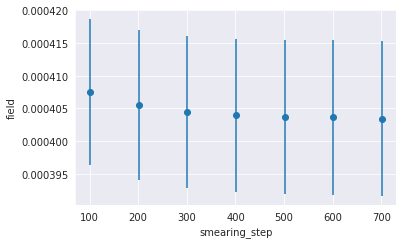

12 12 0


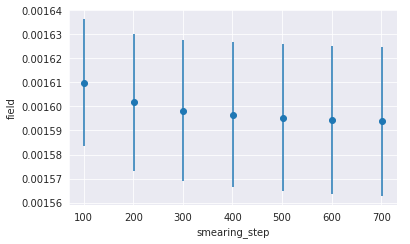

12 12 6


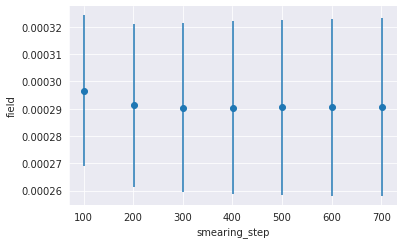

In [5]:
plot_smearing_dependence('', 'mu0.00', 'su2', 'monopole', '40^4', 'HYP0_alpha=1_1_0.5_APE_alpha=0.5', 'qc2dstag', 100, 810)